In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex
import modeling as m
import viz_kmeans as v

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
# Clustering
from sklearn.cluster import KMeans




# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

In [6]:
X = iris[['sepal_area','petal_area']]

In [7]:
iris, X_scaled, scaler, kmeans, centroids = m.create_cluster(iris, X, 3)

# Visualize the results of your clustering.


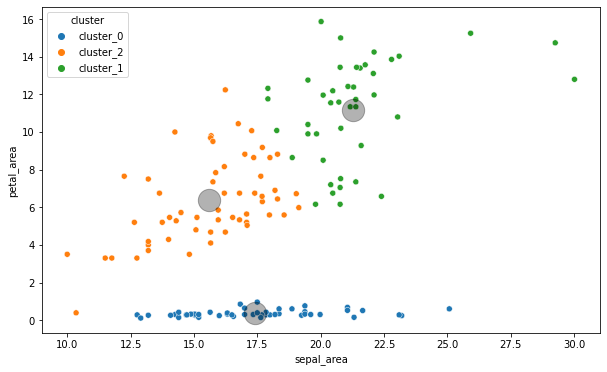

In [8]:
m.create_scatter_plot('sepal_area','petal_area',iris, kmeans, X_scaled, scaler)

In [9]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
1,5.1,3.5,1.4,0.2,setosa,0.28,17.85,0
2,4.9,3.0,1.4,0.2,setosa,0.28,14.70,0
3,4.7,3.2,1.3,0.2,setosa,0.26,15.04,0
4,4.6,3.1,1.5,0.2,setosa,0.30,14.26,0
5,5.0,3.6,1.4,0.2,setosa,0.28,18.00,0


In [10]:
print(kmeans)

KMeans(n_clusters=3, random_state=539)


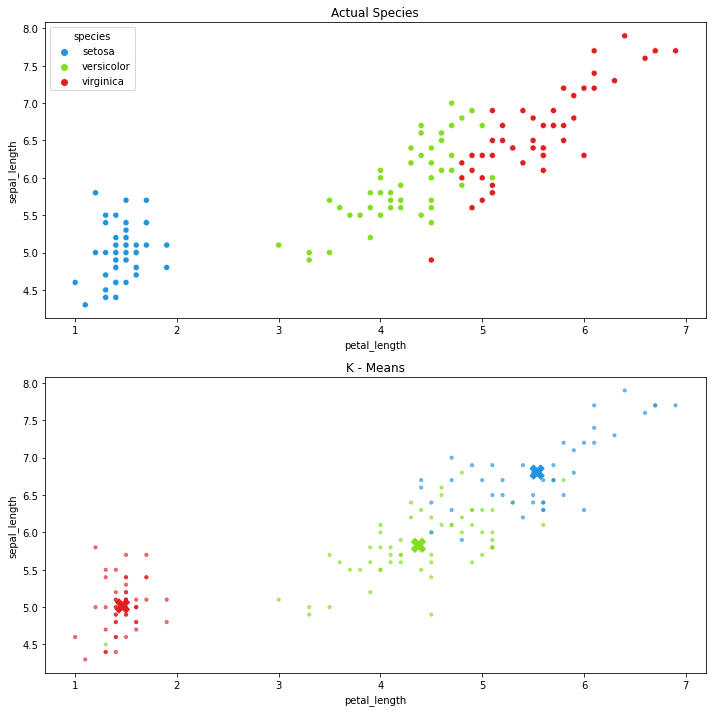

In [11]:
v.viz_iris(iris, kmeans)

# Use the elbow method to visually select a good value for k.


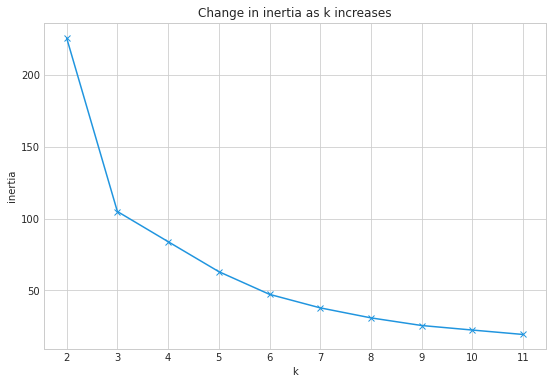

In [12]:
## intertia graph

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Repeat the clustering, this time with 3 different features.


In [13]:
X2 = iris[['sepal_length', 'petal_length', 'sepal_width']]

In [14]:
scaler = StandardScaler().fit(X2)
X2_scaled = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])

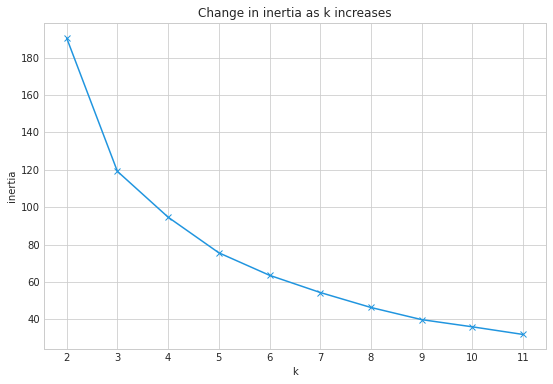

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [16]:
iris['cluster2'] = kmeans.predict(X2_scaled)

X2_scaled['cluster2'] = kmeans.predict(X2_scaled)

iris.head()

ValueError: Incorrect number of features. Got 3 features, expected 2.

## **KMeans will not allow 3 features**

# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [17]:
train, validate, test = w.wrangle_mall()

In [18]:
train.shape, validate.shape, test.shape

((112, 9), (48, 9), (40, 9))

In [19]:
train.head()

,customer_id,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,gender_Male
130,131,47,0.459016,0.081633,0,0,0.0,0,1
62,63,67,0.262295,0.520408,0,0,0.0,0,0
13,14,24,0.040984,0.775510,0,0,0.0,0,0
173,174,36,0.590164,0.928571,0,0,0.0,0,1
144,145,25,0.508197,0.112245,0,0,0.0,0,1


In [20]:
X_mall = train[['age','annual_income']]

In [21]:
scaler = StandardScaler().fit(X_mall)
X_mall_scaled = pd.DataFrame(scaler.transform(X_mall), columns= X_mall.columns).set_index([X_mall.index.values])

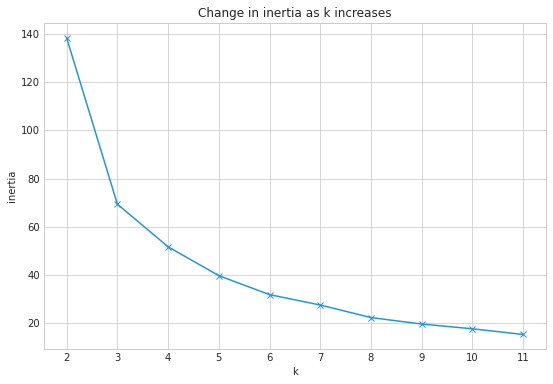

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_mall_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Set K = 3

In [23]:
train, X_mall_scaled, scaler, kmeans, centroids = m.create_cluster(train, X_mall, 5)

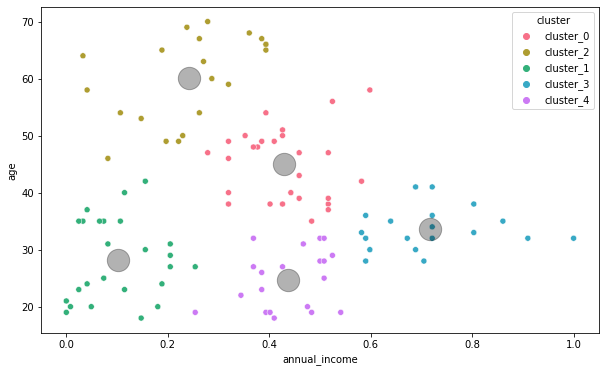

In [24]:
m.create_scatter_plot('annual_income', 'age' ,train, kmeans, X_mall_scaled, scaler)
plt.show()


# How does scaling impact the results of clustering?

# Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

## Unscaled

In [25]:
df = w.get_mall_data(cached=True)
df = ex.add_upper_outlier_columns(df, 1.5)
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [26]:
X = df[['age','annual_income']]

In [28]:
scaler = StandardScaler(copy=True).fit(X)
X_unscaled = pd.DataFrame(X).set_index([X.index.values])
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [34]:
X_unscaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0


In [39]:
### Unscaled
#define the thing
kmeans_u = KMeans(n_clusters=3)

# fit the thing
kmeans_u.fit(X_unscaled)

# Use (predict using) the thing 
kmeans_u.predict(X_unscaled)

### Scaled

#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [52]:
X_unscaled['cluster_u'] = kmeans_u.predict(X_unscaled)
X_unscaled['cluster_u'] = 'cluster_u_' + train.cluster.astype(str)

In [43]:
df['cluster_s'] = kmeans.predict(X_scaled)
df['cluster_s'] = 'cluster_s_' + train.cluster.astype(str)

In [50]:
X_unscaled.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


ValueError: Shape of passed values is (3, 2), indices imply (3, 3)

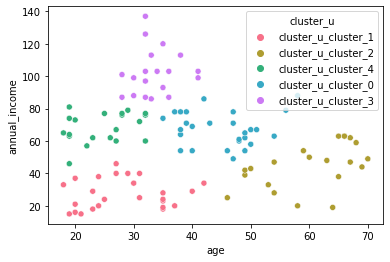

In [55]:

sns.scatterplot(data=X_unscaled, x='age', y='annual_income', hue='cluster_u')
centroids = pd.DataFrame((kmeans_u.cluster_centers_), columns=X_unscaled.columns)
centroids.plot.scatter(y='annual_income', x= 'age', ax=plt.gca(), alpha=.30, s=500, c='black')


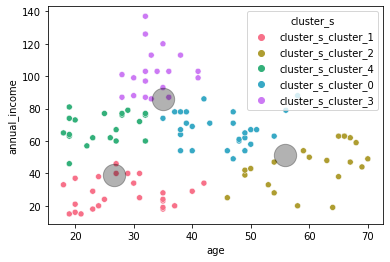

In [46]:
sns.scatterplot(data=df, x='age', y='annual_income', hue='cluster_s')
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
centroids.plot.scatter(y='annual_income', x= 'age', ax=plt.gca(), alpha=.30, s=500, c='black')
plt.show()